<h1>Data Science 2nd Assignment<h1>
<h3>Dataset: OWID Covid Data<h3>
<h3>Mahan Madani – 99222092<h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px

pd.options.display.max_columns = 50
pd.options.display.max_rows = 70

<h3><b>1- Import the Dataset and Preprocess the Data

In [2]:
df = pd.read_csv("owid-covid-data.csv")
print(df.columns)
print(df.shape)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [3]:
df.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355174 entries, 0 to 355173
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    355174 non-null  object 
 1   continent                                   338302 non-null  object 
 2   location                                    355174 non-null  object 
 3   date                                        355174 non-null  object 
 4   total_cases                                 317212 non-null  float64
 5   new_cases                                   345616 non-null  float64
 6   new_cases_smoothed                          344357 non-null  float64
 7   total_deaths                                295499 non-null  float64
 8   new_deaths                                  345664 non-null  float64
 9   new_deaths_smoothed                         344434 non-null  float64
 

<h4>Drop Unnecessary Features</h4>

In [5]:
pattern = 'weekly|hundred|thousand|mortality'
filtered_columns = df.filter(regex=pattern, axis=1)

df = df.drop(columns=filtered_columns.columns)
df = df.drop(columns=["life_expectancy", "human_development_index", "tests_units"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355174 entries, 0 to 355173
Data columns (total 47 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               355174 non-null  object 
 1   continent                              338302 non-null  object 
 2   location                               355174 non-null  object 
 3   date                                   355174 non-null  object 
 4   total_cases                            317212 non-null  float64
 5   new_cases                              345616 non-null  float64
 6   new_cases_smoothed                     344357 non-null  float64
 7   total_deaths                           295499 non-null  float64
 8   new_deaths                             345664 non-null  float64
 9   new_deaths_smoothed                    344434 non-null  float64
 10  total_cases_per_million                317212 non-null  

<h4>Check for Duplicate Values</h4>

In [6]:
columns_to_check_duplicates = ["iso_code", "date"]
duplicate_rows = df[df.duplicated(subset=columns_to_check_duplicates, keep=False)]

if not duplicate_rows.empty:
    print("Duplicate records found:")
    print(duplicate_rows)
else:
    print("No duplicate records found.")

No duplicate records found.


<h4>Convert Data Types</h4>

In [7]:
df['date'] = pd.to_datetime(df['date'], format='mixed')

<h4>Handle Null Values</h4>

In [8]:
null_counts = df.isnull().sum()
null_table = pd.DataFrame(null_counts, columns=["Null Count"])
null_table

,Null Count
iso_code,0
continent,16872
location,0
date,0
total_cases,37962
new_cases,9558
new_cases_smoothed,10817
total_deaths,59675
new_deaths,9510
new_deaths_smoothed,10740


In [9]:
df['continent'] = df['continent'].fillna('Unknown')

In [10]:
df = df.dropna(subset=['new_cases', 'new_cases_smoothed', 'new_deaths', 'new_deaths_smoothed', 'new_cases_per_million',
                        'new_cases_smoothed_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million'])
df.shape

(344323, 47)

In [11]:
hosp_columns = ['icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million']
tests_columns = ['total_tests', 'new_tests', 'new_tests_smoothed', 'positive_rate', 'tests_per_case']
vaccination_columns = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations']

df.infer_objects(copy=False).dtypes
excluded_columns = hosp_columns + tests_columns + vaccination_columns

cleaned_df = df.drop(columns=excluded_columns)
cleaned_df = cleaned_df.interpolate().bfill()
cleaned_df.shape


C:\Users\Mahan\AppData\Local\Temp\ipykernel_78976\442502232.py:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  cleaned_df = cleaned_df.interpolate().bfill()


(344323, 33)

In [12]:
hosp_df = df.copy() 
hosp_df = hosp_df.dropna(subset=hosp_columns)
hosp_df = hosp_df.interpolate().bfill()
hosp_df.shape

C:\Users\Mahan\AppData\Local\Temp\ipykernel_78976\3606770123.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  hosp_df = hosp_df.interpolate().bfill()


(27870, 47)

In [13]:
tests_df = df.copy()
tests_df = tests_df.dropna(subset=tests_columns)
tests_df = tests_df.interpolate().bfill()
tests_df.shape

C:\Users\Mahan\AppData\Local\Temp\ipykernel_78976\2595537452.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  tests_df = tests_df.interpolate().bfill()


(68126, 47)

In [14]:
vaccination_df = df.copy()
vaccination_df = vaccination_df.dropna(subset=vaccination_columns)
tests_df = tests_df.interpolate().bfill()
vaccination_df.shape

C:\Users\Mahan\AppData\Local\Temp\ipykernel_78976\3098766068.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  tests_df = tests_df.interpolate().bfill()


(36117, 47)

In [15]:
null_counts = cleaned_df.isnull().sum()
null_table = pd.DataFrame(null_counts, columns=["Null Count"])
null_table

,Null Count
iso_code,0
continent,0
location,0
date,0
total_cases,0
new_cases,0
new_cases_smoothed,0
total_deaths,0
new_deaths,0
new_deaths_smoothed,0


In [16]:
df = cleaned_df.reset_index().copy()
df = df.drop(columns=['index'])
df.shape

(344323, 33)

<h4>Feature Generation</h4>

In [17]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['total_smokers'] = df['male_smokers'] + df['female_smokers']
df.iloc[80000]

iso_code                                                 DNK
continent                                             Europe
location                                             Denmark
date                                     2020-07-01 00:00:00
total_cases                                          12768.0
new_cases                                               17.0
new_cases_smoothed                                    29.571
total_deaths                                           611.0
new_deaths                                               0.0
new_deaths_smoothed                                    0.286
total_cases_per_million                             2170.595
new_cases_per_million                                   2.89
new_cases_smoothed_per_million                         5.027
total_deaths_per_million                             103.872
new_deaths_per_million                                   0.0
new_deaths_smoothed_per_million                        0.049
reproduction_rate       

<h4>Detect Outliers</h4>
Identify outliers using the Z-score method

In [18]:
from scipy.stats import zscore
selected_columns = ['total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million',
                    'total_deaths_per_million', 'new_deaths_per_million','new_deaths_smoothed_per_million']

z_scores = pd.DataFrame(zscore(df[selected_columns]), columns=selected_columns)

threshold = 3
outliers = df[(z_scores.abs() > threshold).any(axis=1)]

print("Outlier records:")
print(outliers)

Outlier records:
       iso_code continent           location       date  total_cases  \
6401        ASM   Oceania     American Samoa 2022-03-15        779.0   
6403        ASM   Oceania     American Samoa 2022-03-17       1063.0   
6404        ASM   Oceania     American Samoa 2022-03-18       1063.0   
6405        ASM   Oceania     American Samoa 2022-03-19       1063.0   
6406        ASM   Oceania     American Samoa 2022-03-20       1397.0   
...         ...       ...                ...        ...          ...   
338562      WLF   Oceania  Wallis and Futuna 2023-06-02       3550.0   
338563      WLF   Oceania  Wallis and Futuna 2023-06-03       3550.0   
338564      WLF   Oceania  Wallis and Futuna 2023-06-04       3550.0   
338565      WLF   Oceania  Wallis and Futuna 2023-06-05       3550.0   
338566      WLF   Oceania  Wallis and Futuna 2023-06-06       3550.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
6401        163.0              61.000     77.728625

In [19]:
df_with_outlier = df.copy()
df = df[(z_scores.abs() < threshold).all(axis=1)].reset_index()
df = df.drop(columns=['index'])

print("\nDataFrame without outliers:")
print(df)


DataFrame without outliers:
       iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-01-08          1.0        0.0   
1           AFG      Asia  Afghanistan 2020-01-09          1.0        0.0   
2           AFG      Asia  Afghanistan 2020-01-10          1.0        0.0   
3           AFG      Asia  Afghanistan 2020-01-11          1.0        0.0   
4           AFG      Asia  Afghanistan 2020-01-12          1.0        0.0   
...         ...       ...          ...        ...          ...        ...   
319635      ZWE    Africa     Zimbabwe 2023-11-04     265848.0        0.0   
319636      ZWE    Africa     Zimbabwe 2023-11-05     265848.0        0.0   
319637      ZWE    Africa     Zimbabwe 2023-11-06     265848.0        0.0   
319638      ZWE    Africa     Zimbabwe 2023-11-07     265848.0        0.0   
319639      ZWE    Africa     Zimbabwe 2023-11-08     265848.0        0.0   

        new_cases_smoothed  total_deaths  new_

<h3><b>2- Data Analysis

In [20]:
df.describe()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,population,year,total_smokers
count,319640,3.196400e+05,3.196400e+05,3.196400e+05,3.196400e+05,319640.000000,319640.000000,319640.000000,319640.000000,319640.000000,319640.000000,319640.000000,319640.000000,319640.000000,3.196400e+05,319640.000000,3.196400e+05,319640.000000,319640.000000,319640.000000,319640.000000,319640.000000,319640.000000,319640.000000,319640.000000,319640.000000,319640.000000,319640.000000,319640.000000,3.196400e+05,319640.000000,319640.000000
mean,2021-11-23 23:10:13.950694144,7.104964e+06,8.637242e+03,9.114030e+03,8.581091e+04,82.153832,85.081577,85665.190019,70.618979,85.417138,714.003448,0.481066,0.590283,0.939602,1.776251e+05,1800.586876,7.277906e+04,28.061930,297.104607,29.755190,8.257814,5.163531,18462.279511,13.675594,265.661446,8.734022,10.812613,31.914936,49.180903,1.401330e+08,2021.409326,42.727548
min,2020-01-08 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.070000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,4.700000e+01,2020.000000,8.000000
25%,2020-12-03 00:00:00,7.698000e+03,0.000000e+00,1.430000e-01,1.160000e+02,0.000000,0.000000,2377.745000,0.000000,0.016000,53.181000,0.000000,0.000000,0.630000,2.343624e+02,70.085269,9.200000e+01,6.359271,42.729000,22.200000,3.607000,2.162000,4541.795000,1.000000,182.634000,5.500000,2.800000,23.000000,23.673584,5.237980e+05,2020.000000,29.500000
50%,2021-11-13 00:00:00,6.596850e+04,1.000000e+00,1.928600e+01,1.053000e+03,0.000000,0.143000,22321.496000,0.088000,4.653000,296.567021,0.000000,0.004000,0.941062,1.501000e+03,377.374149,6.230000e+02,17.687062,96.254000,29.100000,6.123637,3.519000,11840.846000,3.600000,245.465000,7.394433,7.554208,31.182499,47.964000,6.630621e+06,2021.000000,42.800000
75%,2022-11-09 00:00:00,7.222175e+05,2.240000e+02,4.142860e+02,1.029402e+04,2.000000,4.286000,110945.340750,27.495000,62.743000,1087.222000,0.123000,0.434000,1.170000,1.298200e+04,1634.000000,4.597207e+03,47.220000,227.322000,37.300000,11.733000,7.359000,26382.287000,21.400000,331.430000,11.280000,17.291619,39.300000,76.345598,3.296952e+07,2022.000000,53.500464
max,2023-11-08 00:00:00,7.718202e+08,8.401960e+06,6.402036e+06,6.978162e+06,27939.000000,14821.857000,551911.174604,3614.534000,1930.549000,4024.494000,16.081000,9.154000,5.870000,4.369164e+07,117113.000000,2.107127e+07,100.000000,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,7.975105e+09,2023.000000,94.800000
std,NaN,4.209532e+07,9.471927e+04,8.633834e+04,4.374832e+05,595.155667,567.160831,128241.735136,236.644638,213.211307,890.493343,1.439362,1.358832,0.529644,1.507537e+06,4849.247260,6.339617e+05,25.953216,1348.965423,8.600291,5.669462,3.870032,19065.051264,18.378621,115.474531,4.979278,9.479804,12.299012,28.849010,6.928608e+08,1.099734,17.264998


In [21]:
df.describe(include=['object'])

,iso_code,continent,location,month
count,319640,319640,319640,319640
unique,246,7,246,12
top,AFG,Africa,Afghanistan,May
freq,1401,79305,1401,28807


<h3><b>3- Data Visualization

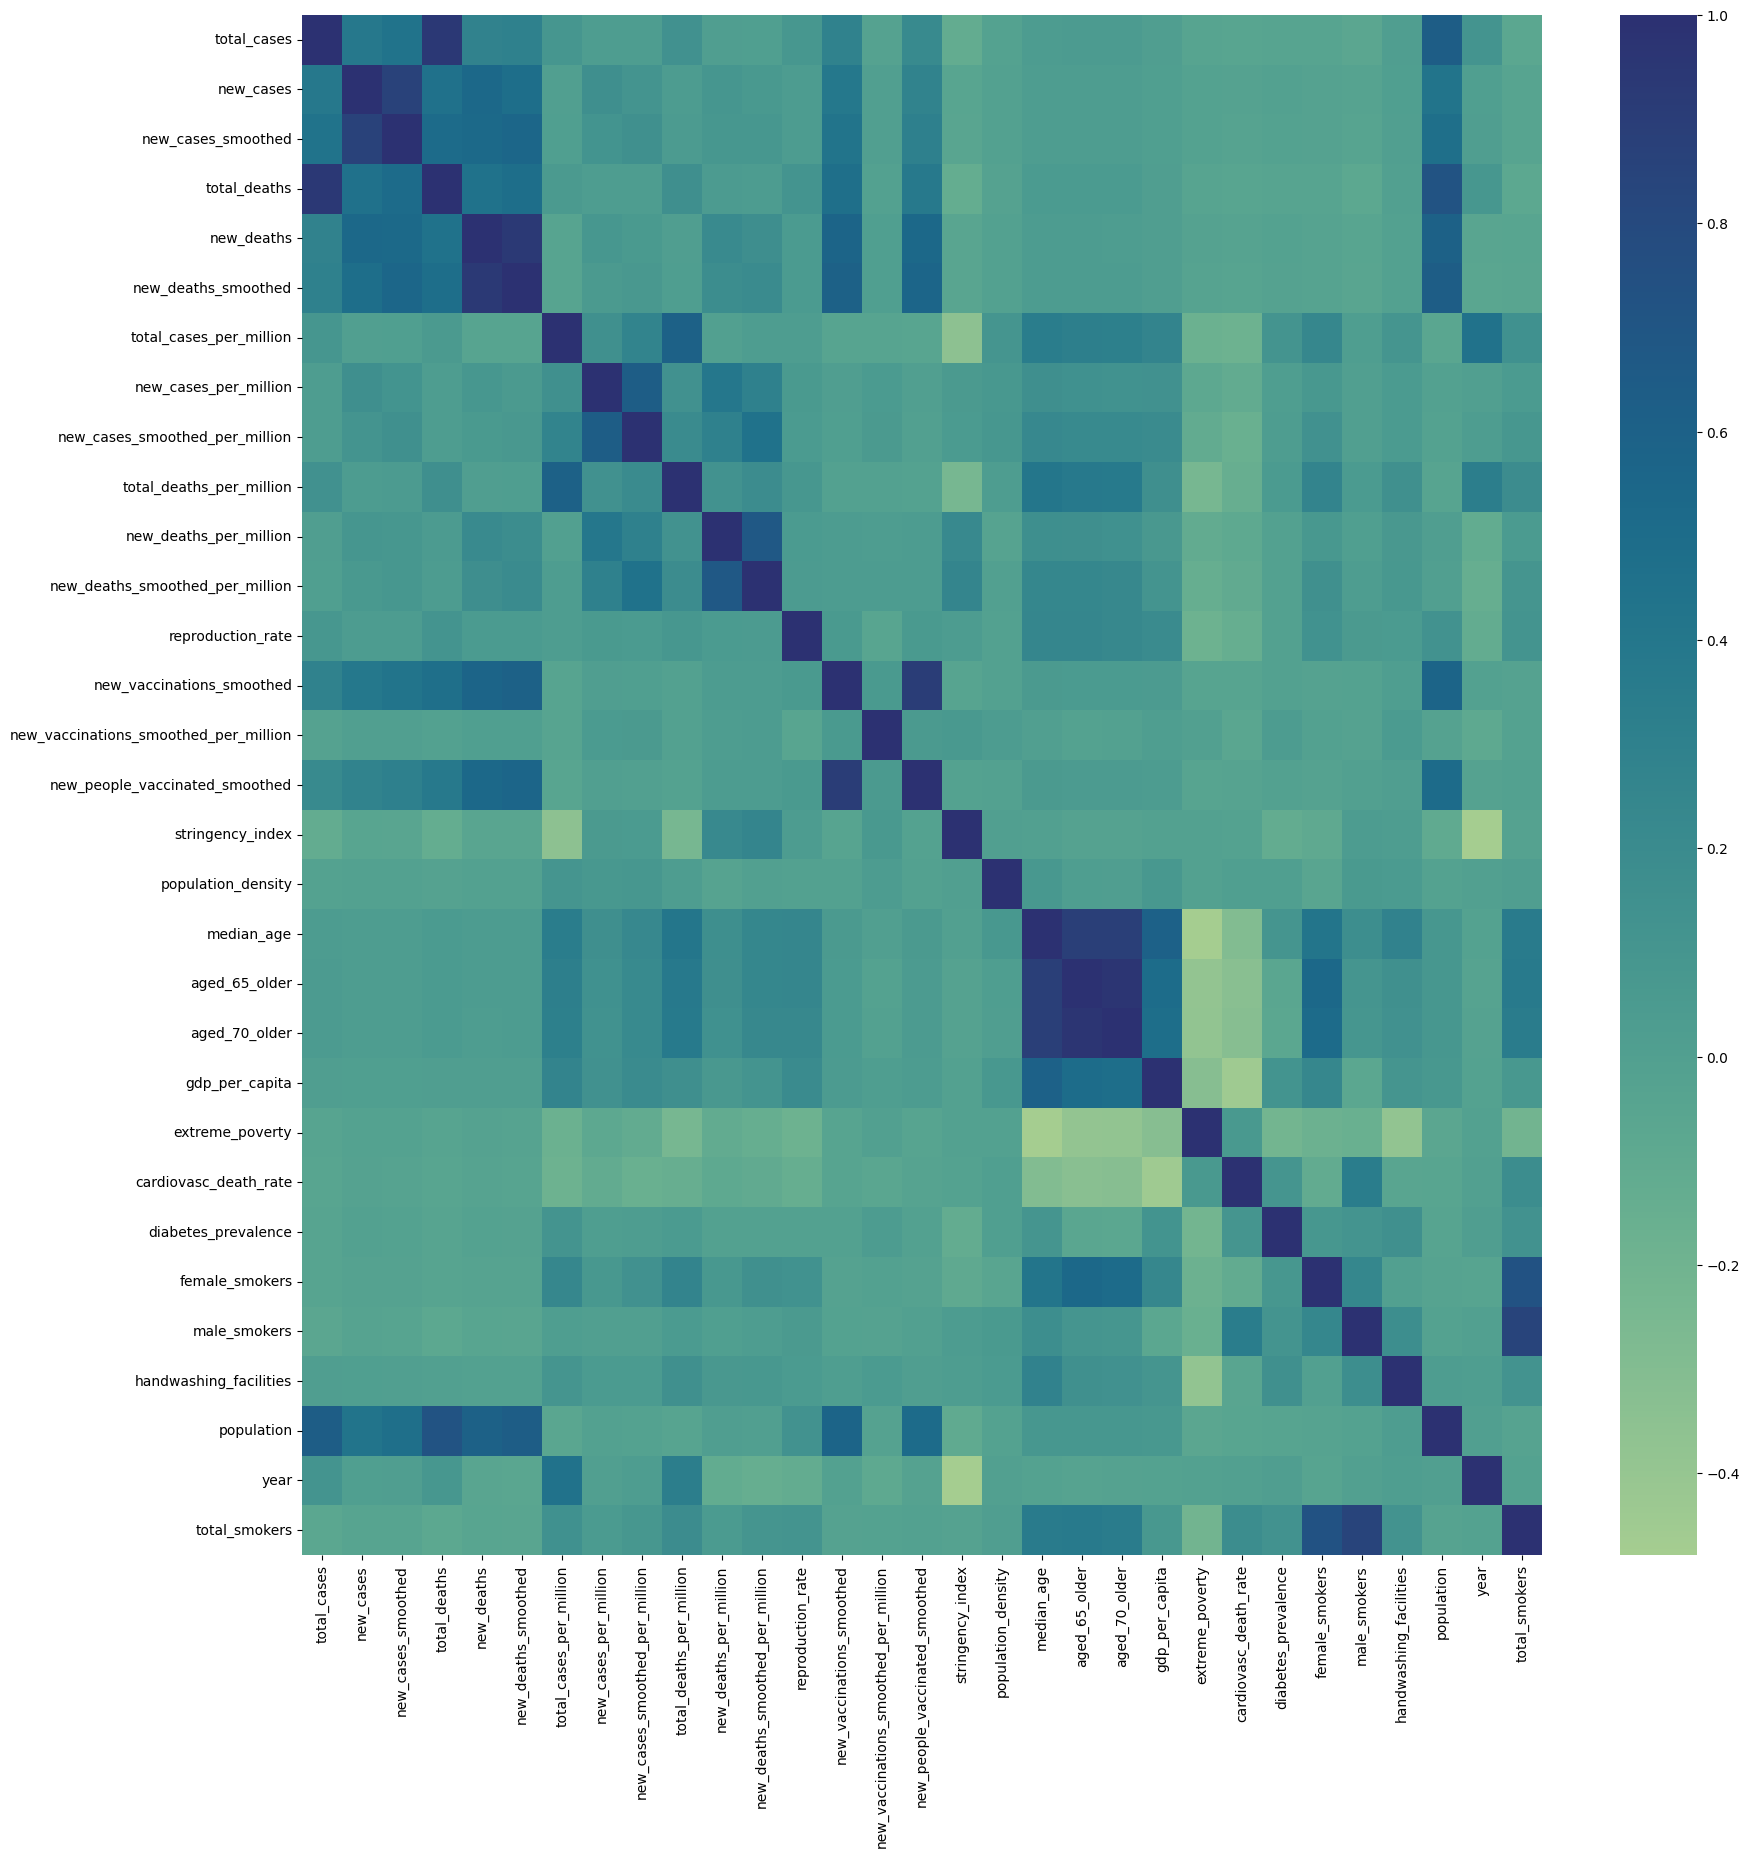

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='crest')
plt.show()

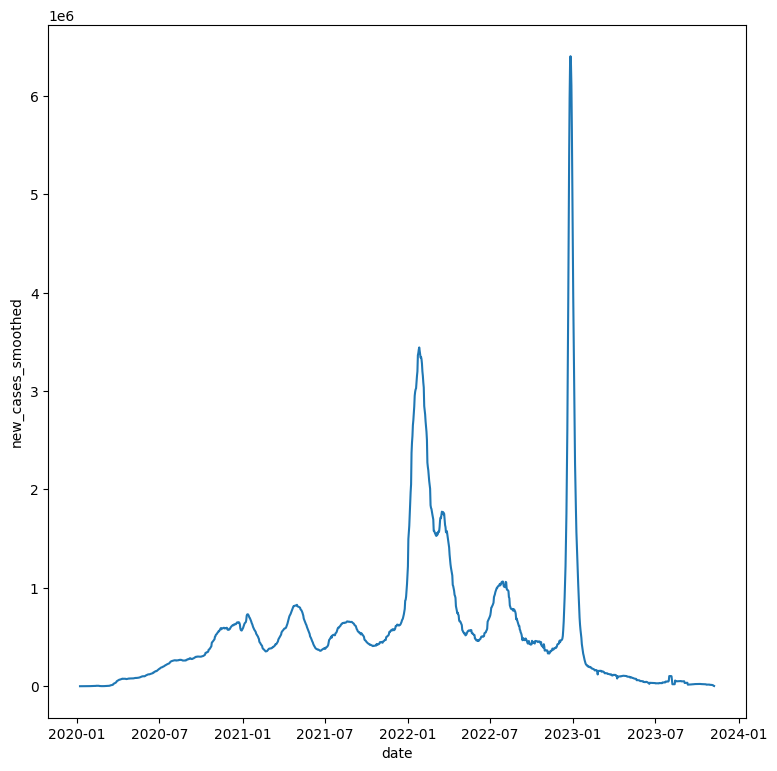

In [23]:
plt.figure(figsize=(9,9))
sns.lineplot(x='date',
             y='new_cases_smoothed',
            data=df[df['location'] == 'World'])

plt.show()

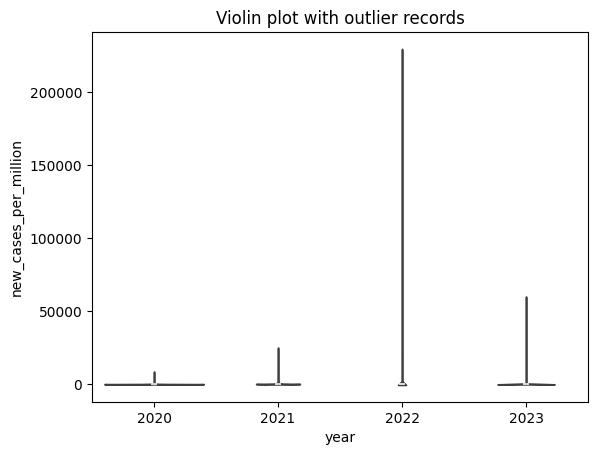

In [24]:
ax = sns.violinplot(x=df_with_outlier['year'], y=df_with_outlier['new_cases_per_million'])
plt.title("Violin plot with outlier records")
plt.show()

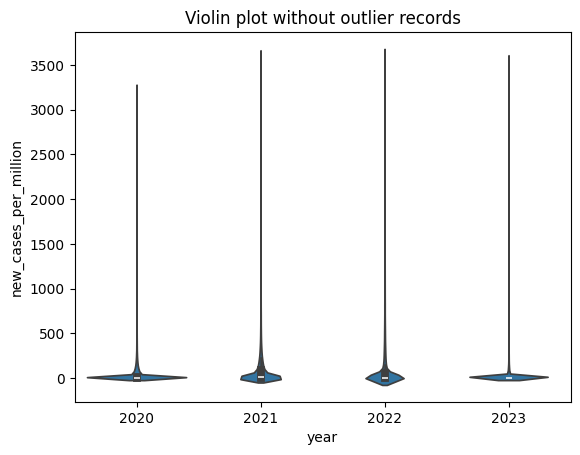

In [25]:
ax = sns.violinplot(x=df['year'], y=df['new_cases_per_million'])
plt.title("Violin plot without outlier records")
plt.show()

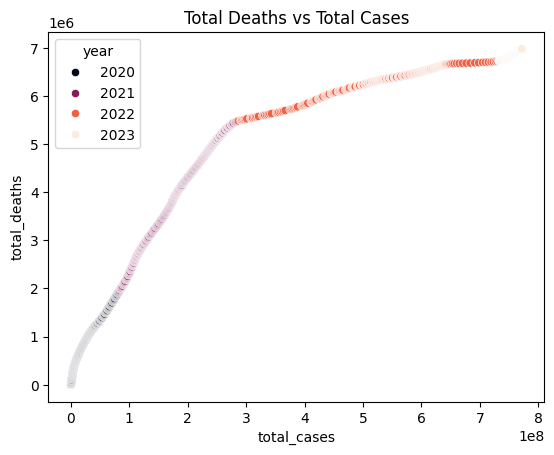

In [26]:
ax = sns.scatterplot(y='total_deaths',
                x='total_cases',
                hue='year',
                palette='rocket',
                data=df[df['location'] == 'World'])
ax.set_title('Total Deaths vs Total Cases')
plt.show()

In [27]:
grouped_df = df[['year', 'month', 'new_cases_per_million']].groupby(['year', 'month']).sum().reset_index()

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

grouped_df['month'] = pd.Categorical(grouped_df['month'], categories=months_order, ordered=True)
grouped_df = grouped_df.sort_values(by=['year', 'month'])

print(grouped_df)

    year      month  new_cases_per_million
4   2020    January                 46.721
3   2020   February                356.521
7   2020      March              47482.723
0   2020      April              87252.942
8   2020        May             109903.525
6   2020       June             149082.517
5   2020       July             197254.379
1   2020     August             271752.062
11  2020  September             307504.890
10  2020    October             520503.049
9   2020   November             547215.471
2   2020   December             566795.703
16  2021    January             586459.939
15  2021   February             463346.453
19  2021      March             623585.771
12  2021      April             646238.485
20  2021        May             505180.413
18  2021       June             379936.364
17  2021       July             639216.161
13  2021     August             874015.720
23  2021  September             804409.309
22  2021    October             727025.949
21  2021   

Text(0.5, 1.0, 'Heatmap of new cases by Year and Month')

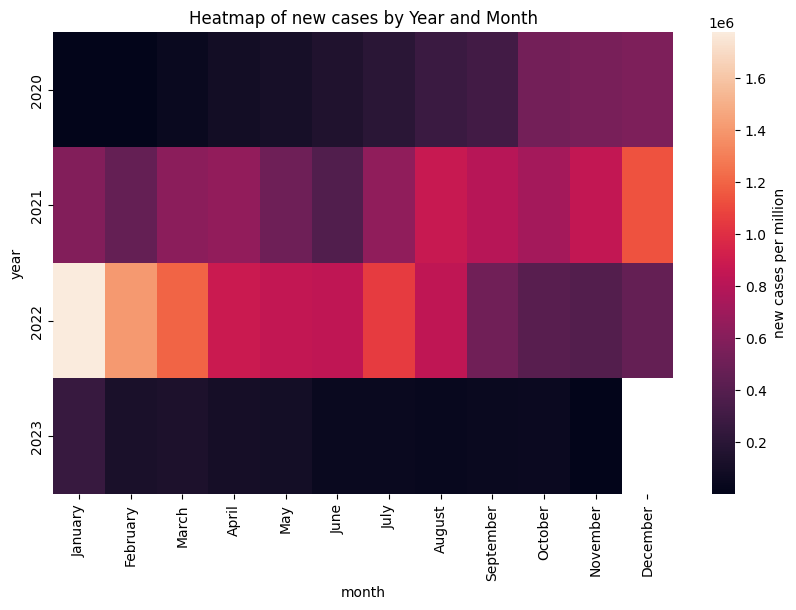

In [28]:
heatmap_data = grouped_df.pivot(index='year', columns='month', values='new_cases_per_million')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=False, cbar_kws={'label': 'new cases per million'})

# Set the title
plt.title('Heatmap of new cases by Year and Month')

In [29]:
grouped_df = df[['location', 'new_deaths', 'continent']]
grouped_df = grouped_df[grouped_df['continent'] != 'Unknown'].groupby(['location']).sum(numeric_only=True).reset_index()
grouped_df.rename(columns={'new_deaths': 'total deaths'}, inplace=True)

print(grouped_df)

              location  total deaths
0          Afghanistan        7956.0
1              Albania        3604.0
2              Algeria        6881.0
3       American Samoa           0.0
4              Andorra          59.0
..                 ...           ...
229            Vietnam       42022.0
230  Wallis and Futuna           0.0
231              Yemen        2159.0
232             Zambia        4069.0
233           Zimbabwe        5724.0

[234 rows x 2 columns]


In [30]:
grouped_df.sort_values(by=['total deaths']).reset_index(drop=True)

,location,total deaths
0,San Marino,0.0
1,Nauru,0.0
2,Tuvalu,0.0
3,British Virgin Islands,0.0
4,Montserrat,0.0
...,...,...
229,Mexico,302016.0
230,Russia,400256.0
231,India,533293.0
232,Brazil,542316.0


In [31]:
# Create a choropleth map using plotly
fig = px.choropleth(grouped_df, 
                    locations='location', 
                    locationmode='country names',
                    color='total deaths',
                    title='Total Deaths by Country')

# Show the plot
fig.show()
fig.write_image("map.png", width=1920, height=1080, scale=3)


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
